2.3217784116518683

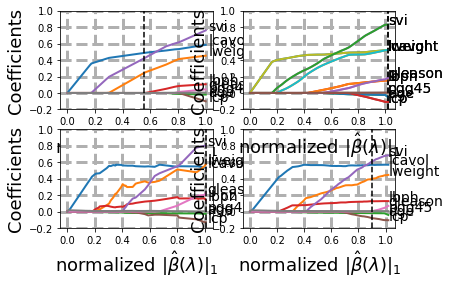

In [7]:
import robustsp as rsp
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io
import pkg_resources

path = pkg_resources.resource_filename('robustsp', 'data/prostate.mat')
names = scipy.io.loadmat(path,struct_as_record=False)['names'][0]
names = [i for i in zip(*names)][0]

X = scipy.io.loadmat(path,struct_as_record=False)['X']
y = scipy.io.loadmat(path,struct_as_record=False)['y']
n,p = X.shape
Xone = np.hstack((np.ones((n,1)),X))
#LSE = np.linalg.lstsq(X)
GRlen = 120

Xcheck = scipy.io.loadmat(path,struct_as_record=False)['X']
ycheck = scipy.io.loadmat(path,struct_as_record=False)['y']

#############   LASSO   ############

B,stats = rsp.enetpath(y,X,1)

k = np.nanargmin(stats['BIC']) # ,29 , 30 in matlab
blas = np.copy(B[:,k]) # LASSO BIC solution 
bmaxlas = np.sum(np.abs(B[1:,-1])) # largest value of || \beta ||_1, 2.0733

# plot LASSO

locs = np.copy(B[1:,-1])
locs[2] = locs[2] - 0.025 # 'age' is too close, so put it down
locs[6] = locs[6] + 0.01
loc_x = np.sum(np.abs(blas[1:-1])) / bmaxlas
xx = np.sum(np.abs(B[1:,:]),axis=0)/bmaxlas # slightly different from Matlab version
Y = B[1:,:]
fig1 = plt.figure(0)
plt.subplot(221)
rsp.prostate_plot_setup(xx,Y,locs,loc_x,names)
fig1.show()

###############   LAD-LASSO   ################

Blad,statslad = rsp.ladlassopath(y,X,reltol=1e-7)
ladind = np.nanargmin(statslad['gBIC'])
blad = Blad[:,ladind] # LAD-Lasso BIC solution
bmaxlad = np.max(np.sum(np.abs(Blad[1:,:]),axis=0)) # largest solution || \beta ||_1

# Plot LAD-LASSO
plt.subplot(223)
locs = Blad[1:,-1] # stellenweise andars als matlab 
locs[1] = locs[1] + 0.02 # lweight up
locs[6] = locs[6] + 0.02 # gleason up
locs[3] = locs[3] - 0.02 # age down
loc_x = np.sum(np.abs(blad[1:])) / bmaxlad
xx = np.sum(np.abs(Blad[1:,:]),axis=0)/bmaxlad 
Y = Blad[1:,:]
rsp.prostate_plot_setup(xx,Y,locs,loc_x,names)
fig1.show()

############   Rank-LASSO   ############

Brlad, _, statsrlad = rsp.ranklassopath(y,X)
rladind = np.nanargmin(statsrlad['gBIC'])
brlad = Brlad[:,rladind]
bmaxrlad = np.max(np.sum(np.abs(Brlad),axis=0))

# Plot Rank-LASSO
plt.subplot(224)
locs = Brlad[:,-1] # stellenweise andars als matlab 
locs[6] = locs[6] + 0.02 # gleason up
locs[2] = locs[2] - 0.02 # age down
loc_x = np.sum(np.abs(brlad)) / bmaxrlad
xx = np.sum(np.abs(Brlad),axis=0)/bmaxrlad 
rsp.prostate_plot_setup(xx,Brlad,locs,loc_x,names)
fig1.show()

############   M-LASSO   ############

Bhub, Bhub2, statshub = rsp.hublassopath(y,X)
hubind = np.nanargmin(statshub['gBIC'])
bhub = Bhub[:,hubind]
bmaxhub = np.max(np.sum(np.abs(Bhub),axis=0))

# Plot Rank-LASSO
plt.subplot(222)
locs = Bhub[:,-1] # stellenweise andars als matlab 
locs[6] = locs[6] + 0.02 # gleason up
locs[2] = locs[2] - 0.03 # age down
loc_x = np.sum(np.abs(bhub)) / bmaxhub
xx = np.sum(np.abs(Bhub),axis=0)/bmaxhub 
rsp.prostate_plot_setup(xx,Bhub,locs,loc_x,names)
fig1.show()

############   M-LASSO   ############

Bhub, _, statshub = rsp.hublassopath(y,X) # wrong
hubind = np.nanargmin(statshub['gBIC'])
bhub = Bhub[:,hubind] # wrong
bmaxhub = np.max(np.sum(np.abs(Bhub),axis=0)) # wrong

# Plot Rank-LASSO
plt.subplot(222)
locs = Bhub[:,-1] # stellenweise andars als matlab 
locs[6] = locs[6] + 0.02 # gleason up

locs[2] = locs[2] - 0.03 # age down
loc_x = np.sum(np.abs(bhub)) / bmaxhub
xx = np.sum(np.abs(Bhub),axis=0)/bmaxhub 
rsp.prostate_plot_setup(xx,Bhub,locs,loc_x,names)
fig1.show()

bmaxhub

In [6]:
Bhub
Bub = scipy.io.loadmat('Bhub.mat',struct_as_record=False)['Bhub']
np.max(Bub-Bhub)

0.29469538144030993

In [8]:
bhub

array([ 0.52041655,  0.51990054, -0.05398641,  0.15025148,  0.82961634,
       -0.10889166,  0.18511649,  0.00359893])

In [ ]:
import robustsp as rsp
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io
import pkg_resources

path = pkg_resources.resource_filename('robustsp', 'data/prostate.mat')
names = scipy.io.loadmat(path,struct_as_record=False)['names'][0]
names = [i for i in zip(*names)][0]

X = scipy.io.loadmat(path,struct_as_record=False)['X']
y = scipy.io.loadmat(path,struct_as_record=False)['y']
n,p = X.shape
Xone = np.hstack((np.ones((n,1)),X))
#LSE = np.linalg.lstsq(X)
GRlen = 120

############   M-LASSO   ############

Bhub, _, statshub = rsp.hublassopath(y,X)
hubind = np.nanargmin(statshub['gBIC'])
bhub = Bhub[:,hubind]
bmaxhub = np.max(np.sum(np.abs(Bhub),axis=0))

# Plot Rank-LASSO
plt.subplot(222)
locs = Bhub[:,-1] # stellenweise andars als matlab 
locs[6] = locs[6] + 0.02 # gleason up

locs[2] = locs[2] - 0.03 # age down
loc_x = np.sum(np.abs(bhub)) / bmaxhub
xx = np.sum(np.abs(Bhub),axis=0)/bmaxhub 
rsp.prostate_plot_setup(xx,Bhub,locs,loc_x,names)
plt.show()#fig1.show()

In [ ]:
import robustsp as rsp
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io
import pkg_resources

fig1 = plt.figure(0)
path = pkg_resources.resource_filename('robustsp', 'data/prostate.mat')
names = scipy.io.loadmat(path,struct_as_record=False)['names'][0]
names = [i for i in zip(*names)][0]

X = scipy.io.loadmat(path,struct_as_record=False)['X']
y = scipy.io.loadmat(path,struct_as_record=False)['y']
n,p = X.shape
Xone = np.hstack((np.ones((n,1)),X))
#LSE = np.linalg.lstsq(X)
GRlen = 120

Xcheck = scipy.io.loadmat(path,struct_as_record=False)['X']
ycheck = scipy.io.loadmat(path,struct_as_record=False)['y']



In [ ]:
a = np.array([[1,2],[3,4]])
b = np.array([4,5,6])
c= np.ones([3,3])


stats = {}
stats['d'] = np.vstack((a,c[1:,:-2].T))
stats['d'] != 0


In [ ]:
np.hstack((np.ones((3,1)),np.eye(3)))
np.repeat(np.arange(1,4)[:,None],3,axis=1)
np.repeat(np.arange(1,4),3,axis=0)

In [ ]:
A = np.eye(3)
B = A.T
C = np.copy(A.T)


B+=1
A,B,C

In [ ]:
a = [1,2,3]
b = np.asarray(a)
c= np.asarray(b)
b+=1
c, b

In [ ]:
a = np.eye(3)*2
b = np.ones(3)
a@b

In [ ]:
from scipy.stats import chi2

m,v,s,k = chi2.stats(1, moments='mvsk')
m,v,s,k

chi2.cdf([1,2,3],1)

In [ ]:
X = np.array([[1,2,3],[4,5,6],[7,8,9]])

X[:,1]

In [ ]:
np.array([[1],[2],[3]]) @np.array([4])[:,np.newaxis]

In [ ]:
np.eye(3)-np.mean(np.eye(3),axis=0)

In [ ]:
np.zeros((1,4))[:,3]